In [7]:
'''
The following notebook is an example of simulations that I performed for my graduate school reasearch.
At its core, it is a quantum mechanical simulation that is described and manipulated used matrices and linear algebra.

This code is automated and generates a final NMR spectrum that consists of three peaks.  
I used this code to determine the spin polarization of GaAs under exotic experimental conditions.  This was done by
simulating the shape of an NMR spectrum at various experimental temperatures (T) and "tip angles" (tipangle)
for a "Pulse-Acquire" NMR experiment.  At high T (greater than 0.05 Kelvin or so), the two peaks on the left and right side
of the spectrum are symmetric.  At low T, these two peaks are not symmetric, and has some wonderful theory ramifications and 
applications. 

The experiment is diagrammed below:

0  1            
 __             
|  |            
|P1|     ACQ    
|  |____________


The x-axis is time, and the system is explicitly calculated at 2 points (labeled 0, 1).
The system is manipulated by a pulse of radio-frequency energy (P1)
The simulated signal can then be generated at and after time point 1 (labeled "ACQ" for "acquisition" of signal.)

The simulation is automated and generates a final NMR spectrum of three peaks of varying intensity.  There are a few suggested variables that can played with to see how the symmetry changes:
    T, tipangle1
'''

'\nThe following notebook is an example of simulations that I performed for my graduate school reasearch.\nAt its core, it is a quantum mechanical simulation that is described and manipulated used matrices and linear algebra.\n\nThis code is automated and generates a final NMR spectrum that consists of three peaks.  \nI used this code to determine the spin polarization of GaAs under exotic experimental conditions.  This was done by\nsimulating the shape of an NMR spectrum at various experimental temperatures (T) and "tip angles" (tipangle)\nfor a "Pulse-Acquire" NMR experiment.  At high T (greater than 0.05 Kelvin or so), the two peaks on the left and right side\nof the spectrum are symmetric.  At low T, these two peaks are not symmetric, and has some wonderful theory ramifications and \napplications. \n\nThe experiment is diagrammed below:\n\n0  1            \n __             \n|  |            \n|P1|     ACQ    \n|  |____________\n\n\nThe x-axis is time, and the system is explicitly c

In [ ]:
import numpy as np
from numpy.linalg import *
import scipy as sp
import scipy.linalg
import cmath
from math import *
import matplotlib.pyplot as plt

def trace(n): return np.trace(n)      #Shorthand to take the trace of a matrix.
def exp(n): return cmath.exp(n)       #Shorthand to take the exponent of a value.
def expm(n): return sp.linalg.expm(n) #Shorthand to take the exponent of a matrix.
def sqrt(n): return n**(1/2)          #Shorthand to take the square root of a value.
def fact(n):                          #Shorthand for factorial.  (Surprisingly not initially a well-defined function!)
    if n == 0:
        return 1
    else:
        return n * fact(n-1)

def LVN(R,M): 
    '''
    Implement the solution for the von Neumann equation for NMR density matrices.
    
    Parameters:
        R: The rotation operator (in matrix form) being implemented
        M: The  density matrix to be transformed.
    
    Returns:
        The transformed density matrix
    '''
    
    return np.matmul(np.matmul(R,M),np.linalg.inv(R))
def PauliMatrices(I):
    '''
    Generates the spin operators for any-sized spin quantum number in array form.
    
    Implementation of an established and common derivation in the literature.  https://www.easyspin.org/documentation/spinoperators.html
    
    Parameters:
        I: Spin quantum number of the nucleus/spin (integer or half-integer only)
    
    Returns:
        Sx: Spin operator that corresponds to the projection along the x-axis.
        Sy: Spin operator that corresponds to the projection along the y-axis.
        Sy: Spin operator that corresponds to the projection along the y-axis.
        Splus: Spin operator that corresponds to the raising of magnetic quantum number.
        Sminus: Spin operator that corresponds to the lowering of magnetic quantum number.
    '''
    
    j_a = np.linspace(-I,I-1,int(2*I))
    k_a = np.linspace(-I,I,int(2*I+1))
    N = int(2*I+1)
    Splus  = np.zeros((N,N))
    Sminus = np.zeros((N,N))
    Sz = np.zeros((N,N))
    for j in j_a:
        m_s = j
        Splus[int(j+I),int(j+I+1)] = (I*(I+1)-m_s*(m_s+1))**(1/2)
        Sminus[int(j+I+1),int(j+I)] = (I*(I+1)-(m_s+1)*m_s)**(1/2)

    Sx = (Splus+Sminus)/2
    Sy = -1j*((Splus-Sminus))/2

    for k in k_a:
        Sz[(int(-k+I),int(-k+I))] = k
    return [Sx,Sy,Sz,Splus,Sminus]


def Wig(I,theta):
    '''
    Generates the Wigner rotation operators for Hermitian square matrices that apply to a particle with spin I.
    
    Wigner matrices are high-level operators that are useful tools for mathematically manipulating an angular momentum quantum mechanical system (spin!) while using the language of rotations.
    This operator is currently written as a rotation about the y-axis
    Implementation of an established and common derivation in the literature.  
    Wigner, Eugene. Group theory: and its application to the quantum mechanics of atomic spectra. Vol. 5. Elsevier, 2012.
    
    Parameters:
        I: Spin quantum number of the nucleus/spin (integer or half-integer only)
        theta: the rotation angle of the rotation being applied
    
    Returns:
        The Wigner rotation matrix in the y-direction
    '''
    mp_a = np.linspace(-I,I,int(2*I+1))
    m_a  = np.linspace(-I,I,int(2*I+1))
    s_a = np.linspace(0,2*I,int(2*I+1))
    d = np.zeros((int(2*I+1),int(2*I+1)))+1j*np.zeros((int(2*I+1),int(2*I+1)))
    for mp in mp_a:
        for m in m_a:
            sum = 0
            for s in s_a:
                if I+m-s >=0 and s >=0 and mp-m+s >=0 and I-mp-s >=0:
                    B = ((-1)**(s)*sqrt(fact(I+mp)*fact(I-mp)*fact(I+m)*fact(I-m)))/(fact(I+m-s)*fact(s)*fact(mp-m+s)*fact(I-mp-s))
                    C = (cos(theta/2))**(2*I+m-mp-(2*s))
                    D = (sin(theta/2))**(mp-m+(2*s))
                    sum = sum+B*exp(-1*1j*np.pi/2*mp)*C*D*exp(1j*np.pi/2*mp)
            d[int(mp+I),int(m+I)] = sum
    return d


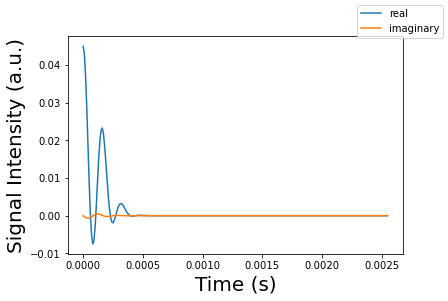

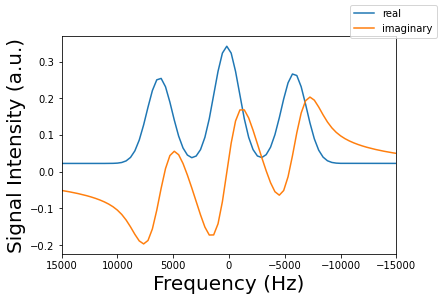

In [8]:
#Suggested 'manipulatable' variables:
T  = -0.05                #Experimental temperature, Kelvin
tipangle1 = -55             #Tip angle of pulse 1, degrees



#Constants and other variables:
kB = 2.0836612*10**10       #Boltzmann Constant, Hz/Kelvin
B0 = 7                      #Magnetic field strength, Tesla
I = 3/2                     #Spin quantum number of 75As
gamma_75As =7.2919*10**6    #gyromagnetic ratio of 75As nuclei, Hz/Tesla
T2 = 0.0002                 #Line broadening time constant, seconds
nuQ = 6000                  #Quadrupolar splitting, Hz
nuOffset = 0                #Carrier frequency offset, Hz
dwell = 10*10**-6           #dwell time of signal acquisition, s
numpoint = 2**8             #number of data points acquired


#Define Spin Matrices 
[Ix,Iy,Iz,Iplus,Iminus] = PauliMatrices(I) #These matrices are the 'building blocks' of this type of quantum mechanical simulations.  They'll show up in every line in some form.


#Hamiltonians (the quantum mechanical descriptions of energy couplings, and such)
H_Z = -gamma_75As*Iz*2*np.pi                                    #Zeeman Interaction
H_1Q = nuQ/6*(3*Iz**2-I*(I+1)*np.identity(int(2*I+1)))*2*np.pi  #First-order Quadrupolar
H_Offset = nuOffset*Iz*2*np.pi                                  #Offset freqency (for data simulation)
H_FID = H_1Q+H_Offset                                           #The Hamiltonian active during signal acquisition

#Derive initial density matrix. The "density matrix" is the matrix that describes the entire system at a given time.  In this case, at time = 0 (see diagram), the initial density matrix.'''

rho0 = expm(-H_Z/kB/T)/trace(expm(-H_Z/kB/T))  


#Define radio-frequency (RF) energy pulses, represented in matrix form.  These are highly common in NMR to manipulate density matrices in order to do cool physics.  
#They're often described with the language of rotations, hence the "tip angles."
P1 = expm(-1j*tipangle1/180*np.pi*Iy)      #RF pulse along the +y direction
P1 = expm(-1j*tipangle1/180*np.pi*Iy)      #There is a known sp.linalg.expm bug when handling sparse matrices.  Duplicating this line fixes it!


#Derive the density matrices at times 1-4 (see diagram).  This heavily relies on the background "Liouville-von Neumann" equation, which here, is a custom-defined function.
#rho0: The initial density matrix
#rho1: The density matrix immediately after the first RF pulse
rho1 = LVN(P1,rho0)          #Calculate rho1 by inputting P1 and rho0

#initialize the dimensions of the NMR spectra based on experimentally-controlled varaibles "dwell" and "numpoint."
time = np.linspace(0,(numpoint-1)*dwell,numpoint)
nu = np.linspace(-0.5*(1/dwell),0.5*(1/dwell),numpoint)

#Simulate the NMR signal
#Signal is detected in real-time as the density matrix evolves in real-time, under influence of the H_FID Hamiltonian.
rhostep = np.empty((numpoint,int(len(rho1)),int(len(rho1))),dtype=complex)  #initialize
signal = np.empty((numpoint),dtype=complex)                                 #initialize

for n in range(numpoint):
    rhostep[n,:,:] = LVN(expm(-1j*H_FID*time[n]),rho1)  #Evolution of the density matrix rho4 in real-time
    signal[n] = np.trace(np.matmul(rhostep[n,:,:],Iplus))*exp(-(n*dwell)**2/T2**2) #"Measurement" of signal, stored in the array "signal"

    
#Plot the time-domain signal 
plt.plot(time,signal.real)
plt.plot(time,signal.imag)
plt.xlabel('Time (s)',fontsize = 20)
plt.ylabel('Signal Intensity (a.u.)',fontsize = 20)
plt.figlegend(('real','imaginary'),loc='upper right')
plt.show()

#Plot the frequency-domain signal
fftsignal=np.fft.fftshift(np.fft.fft(signal))  #The signal can be fourier transformed into frequency domain, something arguably more useful to an NMR spectroscopist.
plt.plot(nu,fftsignal.real)
plt.plot(nu,fftsignal.imag)
plt.xlim(15000,-15000)
plt.xlabel('Frequency (Hz)',fontsize = 20)
plt.ylabel('Signal Intensity (a.u.)',fontsize = 20)
plt.figlegend(('real','imaginary'),loc='upper right')
plt.show()